In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
dict_labels = {
    0:"setosa",
    1:"versicolor",
    2:"virginica"
}
df["label"] = df["target"].apply(lambda x: dict_labels[x])
df.drop(columns=["sepal length (cm)","sepal width (cm)"], inplace=True)
df

,petal length (cm),petal width (cm),target,label
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


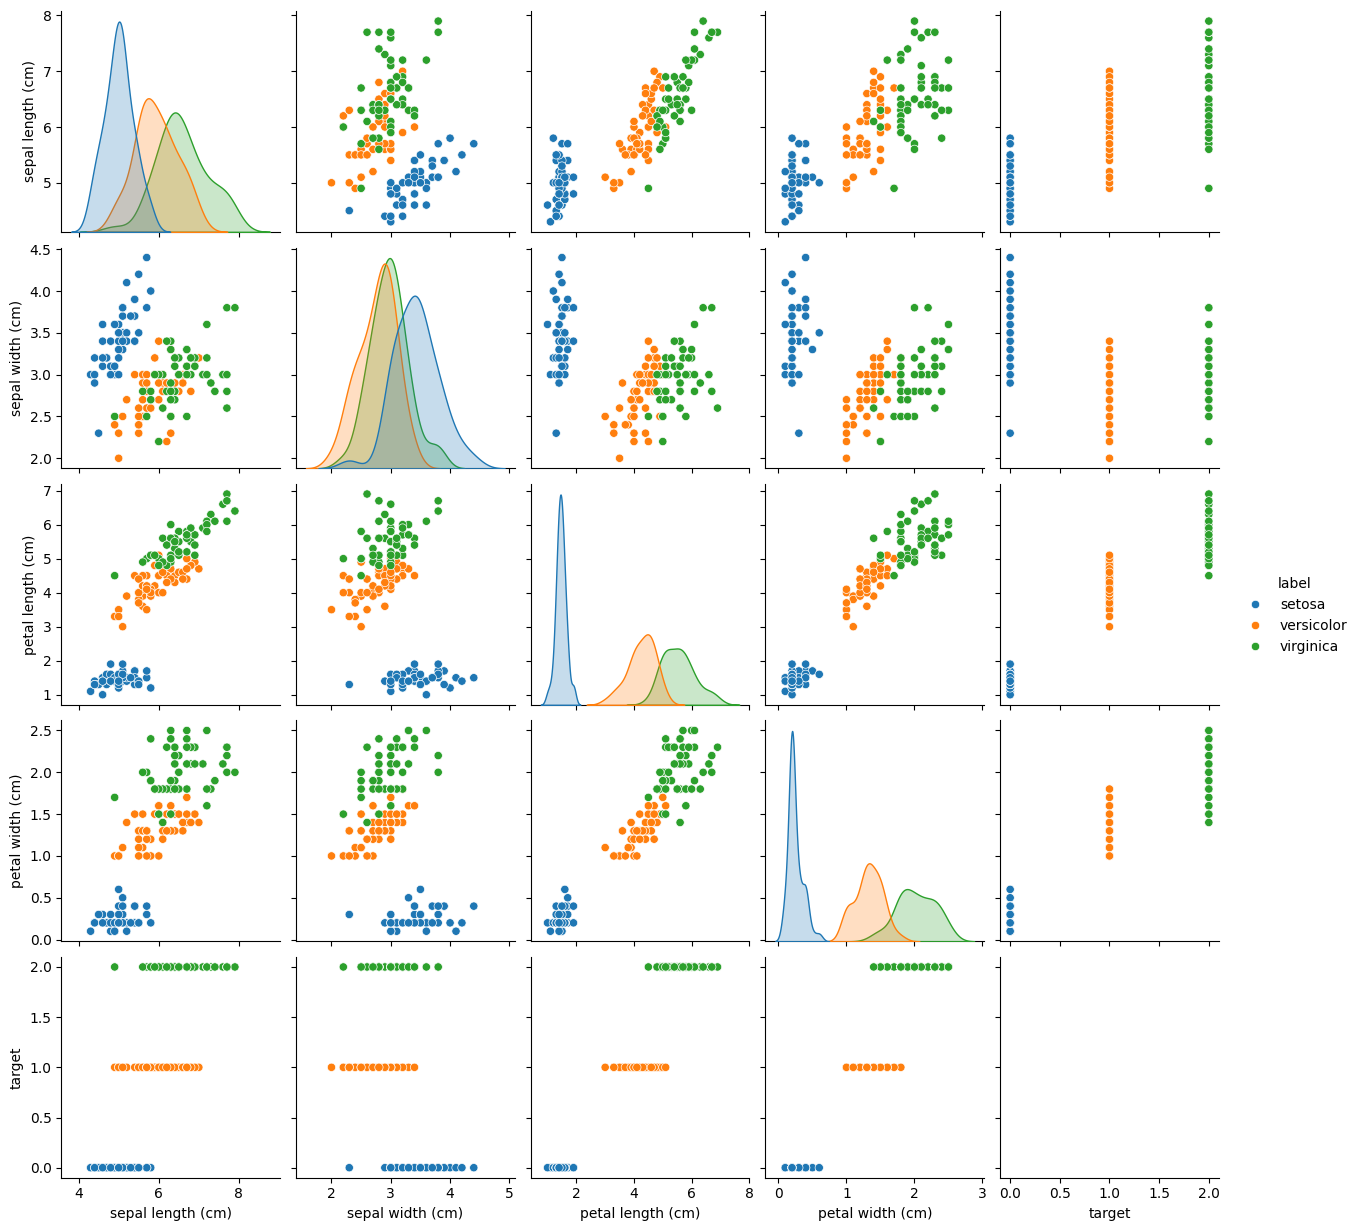

In [18]:
sns.pairplot(df, hue="label")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

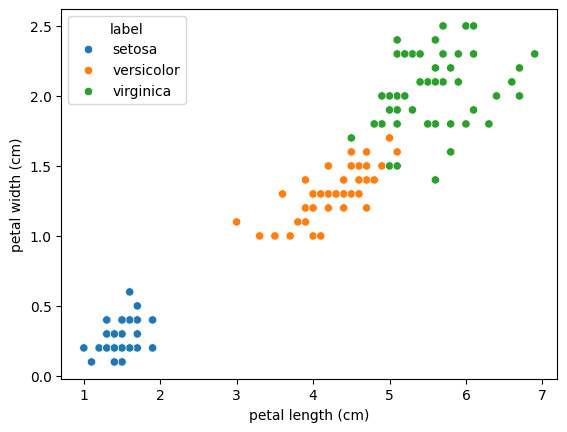

In [26]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="label")

In [30]:
X = df[df.columns[:2]]#.values
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [34]:
km = KMeans(n_clusters=3)
km.fit_transform(X)
km.labels_

/home/davide/Desktop/KNN-test/KNN-test/env_knn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [39]:
df["cluster"] = km.labels_
df["cluster"] = df["cluster"].astype(str)
df

,petal length (cm),petal width (cm),target,label,cluster
0,1.4,0.2,0,setosa,1
1,1.4,0.2,0,setosa,1
2,1.3,0.2,0,setosa,1
3,1.5,0.2,0,setosa,1
4,1.4,0.2,0,setosa,1
...,...,...,...,...,...
145,5.2,2.3,2,virginica,0
146,5.0,1.9,2,virginica,0
147,5.2,2.0,2,virginica,0
148,5.4,2.3,2,virginica,0


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

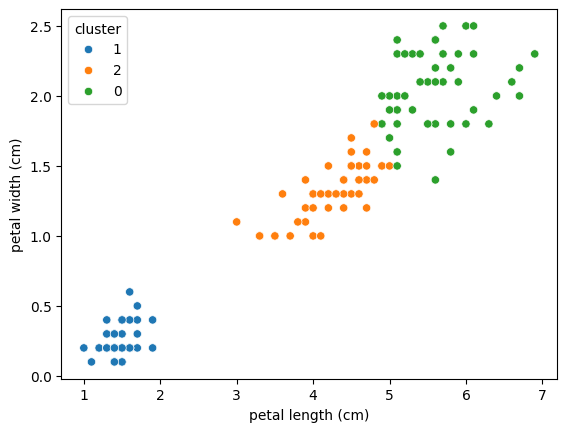

In [40]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="cluster")

/home/davide/Desktop/KNN-test/KNN-test/env_knn/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


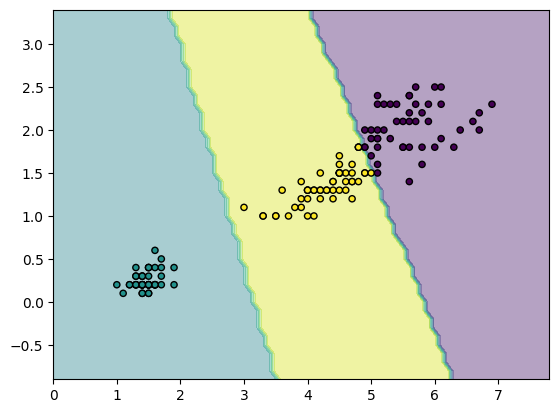

In [53]:
# create a meshgrid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# predict the cluster for each point in the meshgrid
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# plot the meshgrid with the predicted cluster labels as the color
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=km.labels_, s=20, edgecolor='k')
plt.show()